In [1]:
# Top 5 yield of each year in Crops and Livestock Product
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
qcl=pd.read_csv("../data/raw/QCL.csv")
qcl

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,237,Viet Nam,5312,Area harvested,711,"Anise, badian, coriander, cumin, caraway, fenn...",1961,1961,ha,1000.00,E,Estimated value,NaN
1,QCL,Crops and livestock products,237,Viet Nam,5419,Yield,711,"Anise, badian, coriander, cumin, caraway, fenn...",1961,1961,100 g/ha,7000.00,E,Estimated value,NaN
2,QCL,Crops and livestock products,237,Viet Nam,5510,Production,711,"Anise, badian, coriander, cumin, caraway, fenn...",1961,1961,t,700.00,E,Estimated value,NaN
3,QCL,Crops and livestock products,237,Viet Nam,5312,Area harvested,711,"Anise, badian, coriander, cumin, caraway, fenn...",1962,1962,ha,1000.00,E,Estimated value,NaN
4,QCL,Crops and livestock products,237,Viet Nam,5419,Yield,711,"Anise, badian, coriander, cumin, caraway, fenn...",1962,1962,100 g/ha,7000.00,E,Estimated value,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15065,QCL,Crops and livestock products,237,Viet Nam,5419,Yield,1735,Vegetables Primary,2020,2020,100 g/ha,170584.00,E,Estimated value,NaN
15066,QCL,Crops and livestock products,237,Viet Nam,5510,Production,1735,Vegetables Primary,2020,2020,t,17006433.11,E,Estimated value,NaN
15067,QCL,Crops and livestock products,237,Viet Nam,5312,Area harvested,1735,Vegetables Primary,2021,2021,ha,1002974.00,E,Estimated value,NaN
15068,QCL,Crops and livestock products,237,Viet Nam,5419,Yield,1735,Vegetables Primary,2021,2021,100 g/ha,171731.00,E,Estimated value,NaN


C:\Users\Study and more\AppData\Local\Temp\ipykernel_18228\4052518507.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data_year['Item'])


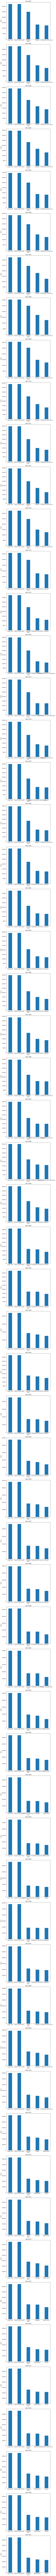

,Year,Item,Value,Unit
0,1961,Sugar cane,321795.0,100 g/ha
1,1961,Sugar Crops Primary,321795.0,100 g/ha
2,1961,Cabbages,250000.0,100 g/ha
3,1961,Potatoes,133333.0,100 g/ha
4,1961,Cauliflowers and broccoli,125000.0,100 g/ha
...,...,...,...,...
300,2021,Sugar cane,647355.0,100 g/ha
301,2021,Sugar Crops Primary,647355.0,100 g/ha
302,2021,Cabbages,272604.0,100 g/ha
303,2021,Watermelons,239979.0,100 g/ha


In [4]:

yields= qcl[qcl['Element Code'] == 5419]
years = yields['Year'].unique()
result = []

for year in years:
    data_year = yields[yields['Year'] == year]
    top_5 = data_year.nlargest(5, 'Value')
    for idx, row in top_5.iterrows():
        result.append({
            'Year': row['Year'],
            'Item': row['Item'],
            'Value': row['Value'],
            'Unit': row['Unit']
        })

result_df = pd.DataFrame(result, columns=['Year', 'Item', 'Value', 'Unit'])

fig, axs = plt.subplots(nrows=len(years), figsize=(8, 6 * len(years)), dpi=80)

for i, year in enumerate(years):
    data_year = result_df[result_df['Year'] == year]
    ax = axs[i]
    ax.bar(data_year['Item'], data_year['Value'], width=0.4)
    ax.set_title(f'Year {year}')
    ax.set_xlabel('Item')
    ax.set_ylabel('Value')
    ax.set_xticklabels(data_year['Item'])

plt.tight_layout()
plt.show()
result_df

`Comment`:

From 1961 to 2021, Sugar Cane and Sugar Crops Primary consistently held the top positions nationwide in yield, almost neck and neck, surpassing the third position by nearly double in most years. However, the third to fifth spots have been subject to frequent changes among a few crop varieties such as Cabbages, Cauliflowers and broccoli, Potatoes, Guavas and mangosteens, Watermelons, Bananas, Grapes, and Pomelos and grapefruits. Notably, Cabbages have maintained a consistent presence in the top 5 throughout the years. Cauliflowers and broccoli sustained its top 5 status until 2011, gradually giving way to other crops, only reappearing in the singular year of 2018 until the present.

Potatoes held a top 5 position from 1961 to 1975, subsequently disappearing, leading to the emergence of Guavas and mangosteens for a brief period from 1976 to 1979, and in 1987 and 1988. Bananas surged in to replace Guavas and mangosteens from 1980 to 1999, except for the years 1987 and 1988. The year 2000 marked the first and only appearance of Pomelos and grapefruits in the top 5, replacing Bananas.

Between 2001 and 2005, Watermelon entered the top 5 and reappeared from 2011 until the end of 2021. Finally, Grapes emerged in 2006 and have consistently maintained a top 5 position ever since.